## Shipboard ADCP data from Cruise 

In [35]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
import cmocean as cm
import cmocean.cm as cmo
import cartopy.feature as cfeature

import cartopy.crs as ccrs

import xarray as xr

In [6]:
ds = xr.open_dataset("os150nb.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:     (time: 2952, depth_cell: 60)
Coordinates:
  * time        (time) datetime64[ns] 2023-03-04T14:46:08 ... 2023-03-10T18:1...
Dimensions without coordinates: depth_cell
Data variables: (12/14)
    trajectory  int32 ...
    lon         (time) float64 ...
    lat         (time) float64 ...
    depth       (time, depth_cell) float32 ...
    u           (time, depth_cell) float32 ...
    v           (time, depth_cell) float32 ...
    ...          ...
    pflag       (time, depth_cell) int8 ...
    heading     (time) float32 ...
    tr_temp     (time) float32 ...
    num_pings   (time) int16 ...
    uship       (time) float32 ...
    vship       (time) float32 ...
Attributes:
    featureType:            trajectoryProfile
    history:                Created: 2023-03-10 18:19:22 UTC
    Conventions:            COARDS
    software:               pycurrents
    hg_changeset:           3252:3174ea43e7d3
    title:                  Shipboard ADCP velocity profiles
    description:            Shipboard ADCP velocity profiles from RR2302 usin...
    cruise_id:              RR2302
    sonar:                  os150nb
    yearbase:               2023
    CODAS_variables:        \nVariables in this CODAS short-form Netcdf file ...
    CODAS_processing_note:  \nCODAS processing note:\n======================\...

In [7]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})

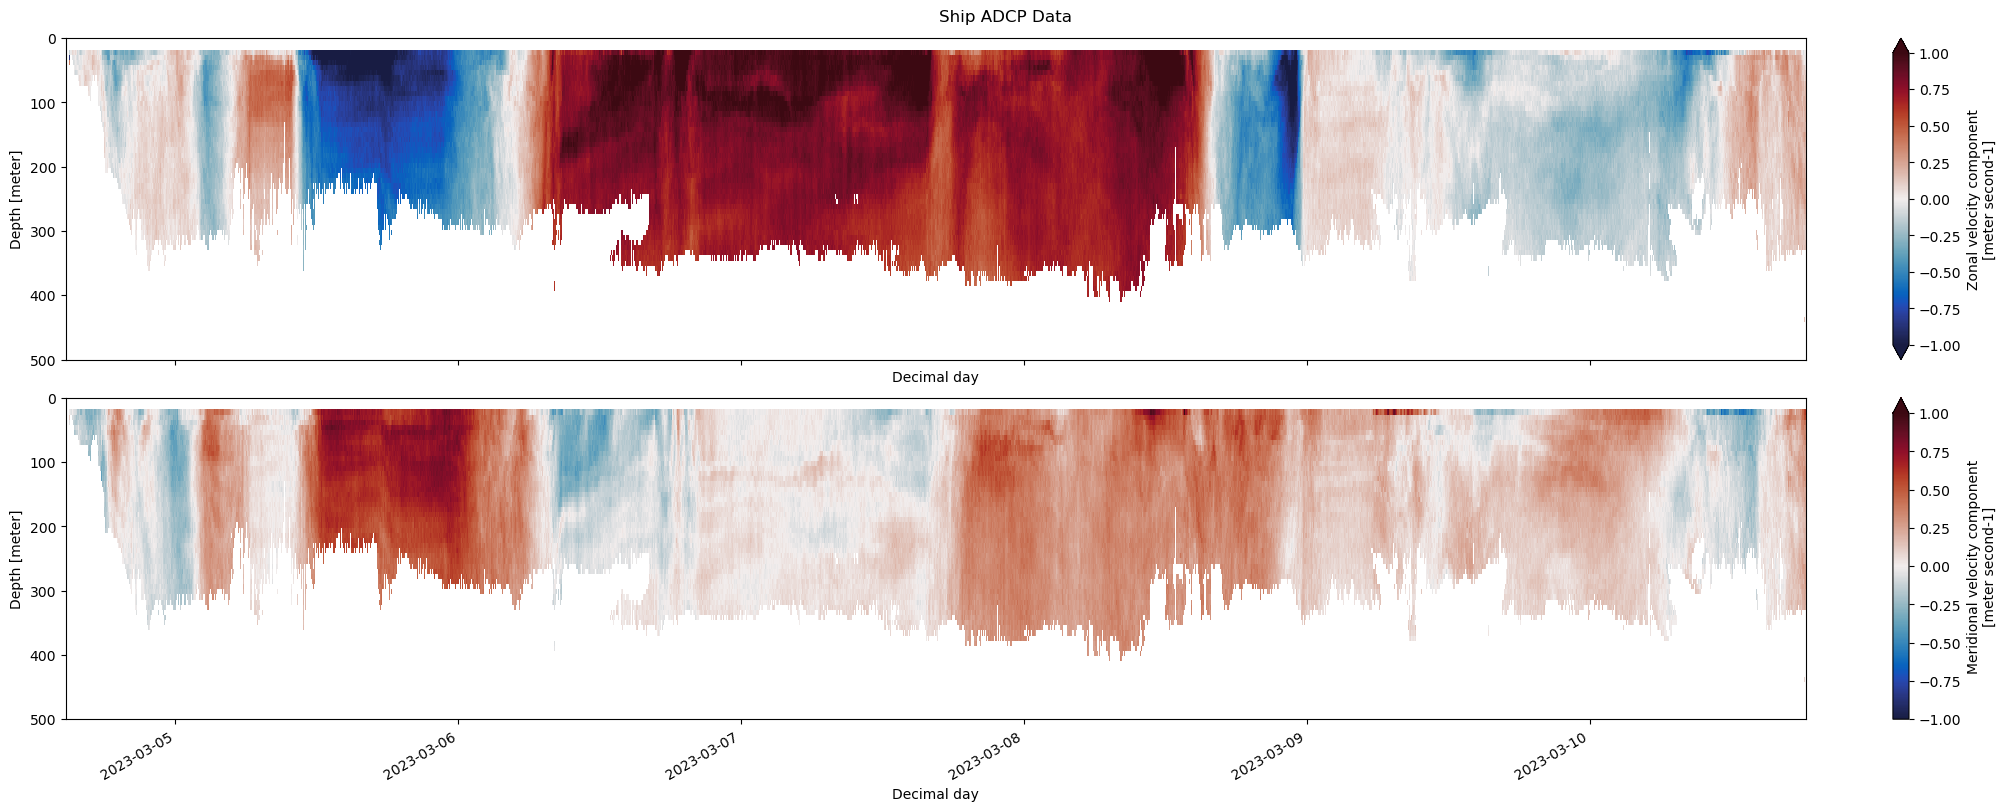

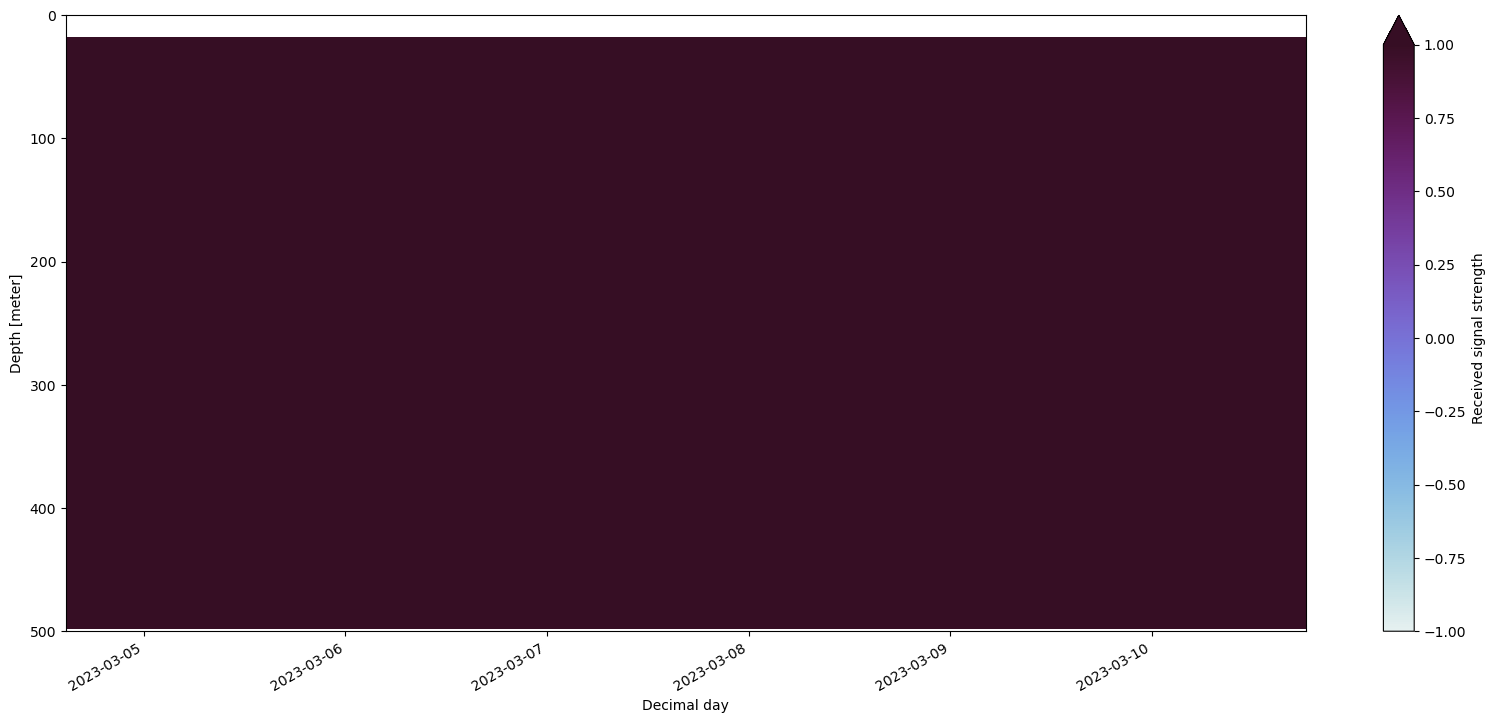

In [90]:
fig, (ax,bx) = plt.subplots(2, 1, figsize=(20,8), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    ds[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax,bx][i])
    
fig.suptitle("Ship ADCP Data")

fig2, ax2 = plt.subplots(1, 1, figsize=(20,8))
ds["amp"].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.dense", ax=ax2)


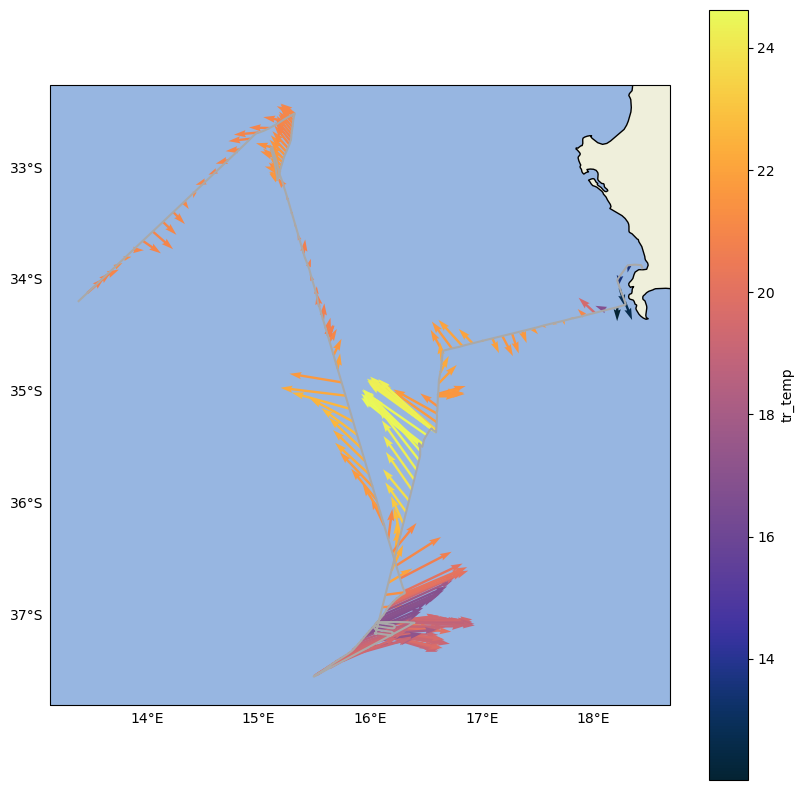

In [79]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(ds.lon, ds.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ds.isel(time=np.arange(0,len(ds.time),12),
        depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp", 
                                                      cmap="cmo.thermal")